# Introduction to NLP Fundamentals in Tensoflow

NLP has the goal of deriving information out of natural lenguage (could be sequences text or speech).

Another common term form NLP problems is sequence to sequence problems (seq2seq).

NLP enables computers and digital devices to recognize, understand and generate text and speech by combining computational linguistics - the rule-based modeling of human language- together with statistical modeling, machine learning and deep learning.

It is part of chatbots for customer services with spoken commands, voice-operated GPS systems and Alexa, Siri o Cortana.

**How is it work?**

NLP works by combining various techniques:
* *Text preprocessing* - it prepares raw text for analysis by transforming it into a format that machines can more easily understand.
* *Feature extraction* - is the process of converting raw text into numerical representations that machines can analyze and interpret.
* *Text analysis* - involves interpreting and extracting meaningful information from text data through varios techniques.
* *Model training*

In [ ]:
!pip install tensorflow==2.15.0

## Check for GPU

In [ ]:
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


## Get helper functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

--2025-01-14 10:53:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2025-01-14 10:53:56 (7.69 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## Get a text dataset

The dataset we are going to be using is Kaggle's introduction to NLP dataset (text samples of Tweets labelled as disaster or not disaster).

See the original source here: https://www.kaggle.com/competitions/nlp-getting-started/data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# Unzip the data
unzip_data("nlp_getting_started.zip")

--2025-01-14 10:54:14--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.207, 142.251.170.207, 173.194.174.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.1’

nlp_getting_started 100%[===================>] 593.11K   852KB/s    in 0.7s    

2025-01-14 10:54:15 (852 KB/s) - ‘nlp_getting_started.zip.1’ saved [607343/607343]



## Visualizing a text dataset

To visualize our text samples, we first have to read them in, one way to do so would be to use Python: https://realpython.com/read-write-files-python/

But I preferr to get visual straight away.

So another way to do this is to use Pandas...

In [ ]:
import pandas as pd

test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# What does the test dataframe look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# How many examples of each class?
train_df.target.value_counts()

,count
target,
0,4342
1,3271


In [ ]:
# How many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes nor higher than the total number of samples
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
  # the first part select olny the text and target columns
  # the second part slices the dataframe to select rows ensuring our that we get 5 consecutive rows
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n {text}\n")
  print("---\n")

Target: 1 (real disaster)
Text:
 @camilacabello97 Internally and externally screaming

---

Target: 0 (not real disaster)
Text:
 @engineermataRAI ate mataas kc rating..but they did not think on doing like this they destroy the story along with the ratings

---

Target: 0 (not real disaster)
Text:
 @AminESPN Mencius tears are worse correct? Takes the explosion n more pain day to day right?

---

Target: 1 (real disaster)
Text:
 Signing a petition to seek mercy on a death punishment for a convivted terrorist is a job well done in India. But asking a foreign govt 1/n

---

Target: 0 (not real disaster)
Text:
 A traumatised dog that was found buried up to its head in dirt in France is now in safe hands. This is such a... http://t.co/AGQo1479xM

---



### Split data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into traning and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, #use 10% of train data for validation split
                                                                            random_state = 42)

In [ ]:
# Check the lenghts
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
# Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Converting text into numbers

When dealing with a text problem, one of the first things you'll have to do before you can build a model is to convert your text to numbers.


In NLP, there are two main concepts for turning text into numbers:

* **Tokenization** - is the process of converting a sequence of text into smaller parts, known as tokens. By converting text into tokens, algorithms can more easily identify patterns. These tokens can be as small as characters or as long as words. There are tree main levels:

 a. Using *word-level tokenization* - this method breaks text down into individual words. The sentence "I love TensorFlow" might result in "I" being `0`, "love" being `1` and "TensorFlow" being `2`. In this case, every word in a sequence is considered a single **token**.

 b. *Character-level tokenization*, such as converting the letters A-Z to values `1-26`. In this case, every character in a sequence considered a single **token**.

 c. *Sub-word tokenization* involves breaking individual words into smaller parts and then converting those smaller parts into numbers. For example, "my favourite food is pineapple pizza" might become "my, fav, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za". After doing this, these subwords would then be mapped to a numerical value. In this case, every word could be considered multiple **tokens**.

* **Embeddings** - An embedding is a representation of natural language which can be learned. Representation comes in the form of a **feature vector**. For example, the word "dance" could be represented by the 5-dimensional vector `[-0.8547, 0.4578, -0.3335, 0.9877, 0.1112]`. It's important to note here, the size of the feature vector is tuneable. There are two ways to use embeddings:

 a. **Create your own embedding** - Once your text has been turned into numbers (required for embeding), you can put them through an embedding layer (such as `tf.keras.layers.Embedding`) and an embedding representation will be learned during model training.

 b. **Reuse a pre-learned embedding** - You can use a pre-trained embedding to initialize your model and fine-tune it to your own specific task.

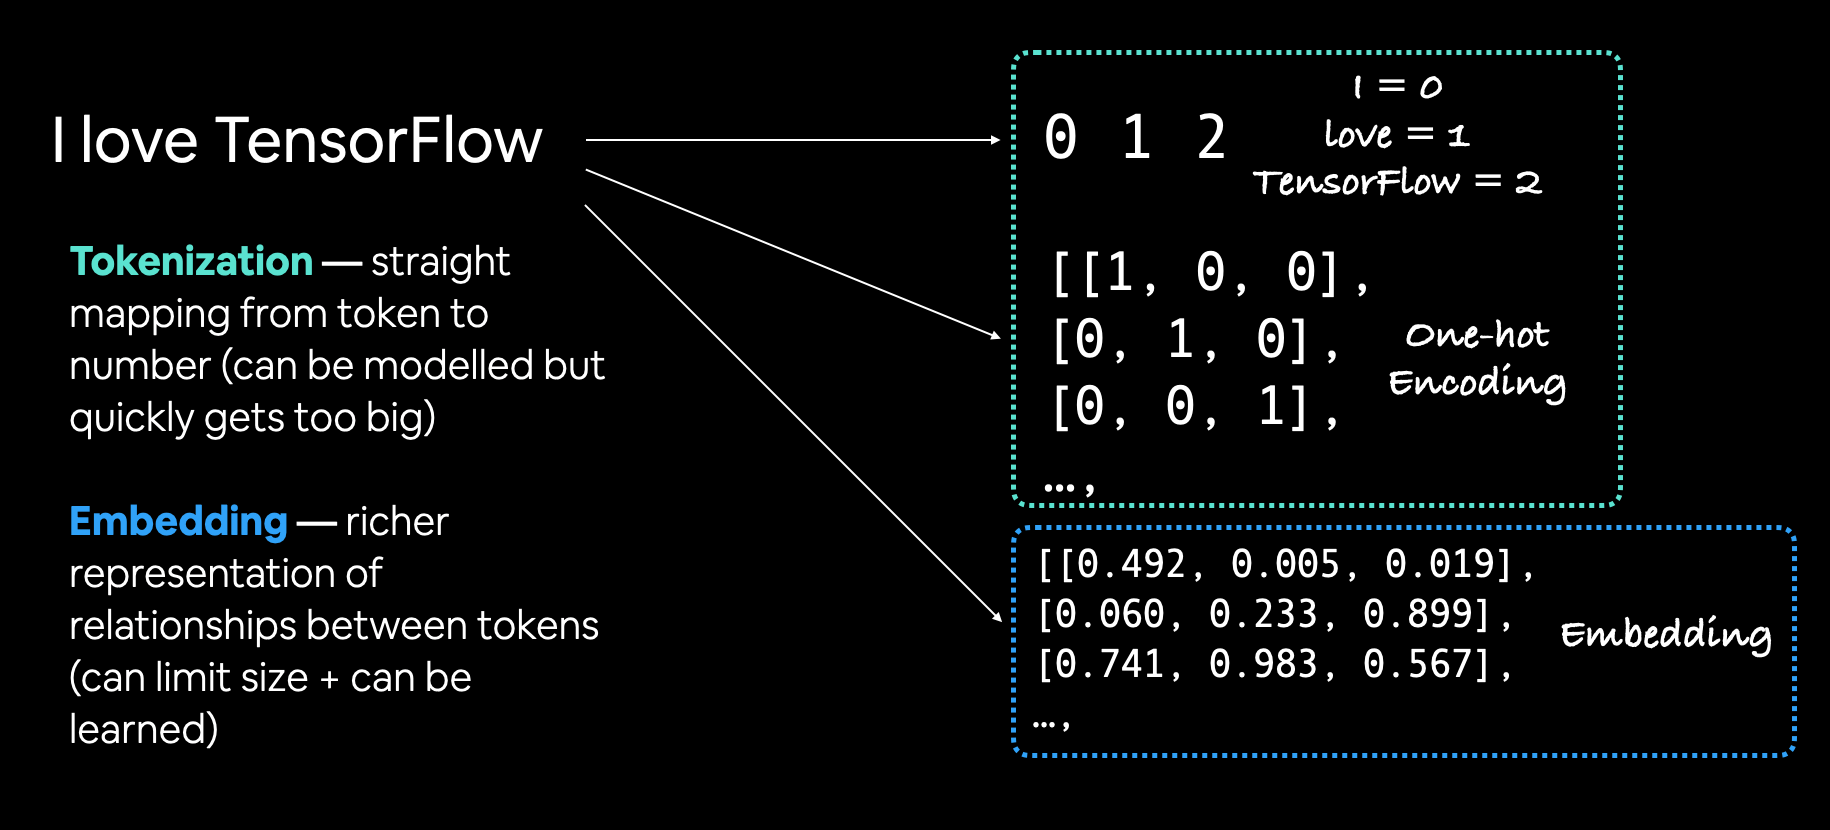

### Text vectorization (tokenization)

In [ ]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (automatically add <OOV>)
                                    standardize="lower_and_strip_punctuation", #in this case text will be lowercased and all puntuaction removed
                                    split="whitespace", #split on whitespace
                                    ngrams=None, #create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long do you want your sequences to be?


In [ ]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
# Set up text vectorization variables
max_vocab_length = 1000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
# Fit the text vectorizer to training text
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
\n\n Vectorized version:")
text_vectorizer([random_sentence])

Original text:
 @KingGerudo_ to the largest moblin's he'd leaving the biggest one for Red and fired. With one strike already the threat was reduced --&gt;

 Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  1,   5,   2,   1,   1,   1,   1,   2,   1,  61,  10, 368,   7,
          1,  14]])>

In [ ]:
# How many unique words in the vocabulary
words_in_vocab =text_vectorizer.get_vocabulary() # get all of the unique words
top_5_words = words_in_vocab[:5] #get the most common words
bottom_5_words = words_in_vocab[-5:] # get the least common words
print (f"Number of words in vocab: {len(words_in_vocab)}")
print(f" 5 Most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number of words in vocab: 1000
 5 Most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['reported', 'r', 'pray', 'playlist', 'patience']


### Creating and Embedding using an Embedding Layer

To make our embedding, we're going to use TensorFlow's embedding layer:https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

The parameters we care most about for our embedding layer:
* `input_dim` = the size of our vocabulary
* `output_dim` = the size of the output embedding vector, for example, a value of 100 would mean each token gets represented by a vector 100 long.
* `input_length` = length of the sequences being passed to the embedding layer.


In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length, # set input shape
                             output_dim = 128) #output shape

embedding

In [ ]:
# Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
\n\nEmbedded version:")

# Embed the random sentences (turn it into dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 @BrrookkllyynnR came through like a tornado and destroyed me. such beautiful words

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.03910357,  0.02555365,  0.04295092, ..., -0.0382244 ,
         -0.03078091, -0.04678245],
        [-0.02551621,  0.03654196,  0.03396437, ..., -0.02641221,
         -0.02718198,  0.01727014],
        [ 0.01506312,  0.00705976,  0.03111348, ...,  0.00606451,
          0.00163102, -0.01712171],
        ...,
        [ 0.01020436, -0.02703956,  0.0187047 , ..., -0.00044413,
          0.00823208,  0.04350256],
        [ 0.01020436, -0.02703956,  0.0187047 , ..., -0.00044413,
          0.00823208,  0.04350256],
        [ 0.01020436, -0.02703956,  0.0187047 , ..., -0.00044413,
          0.00823208,  0.04350256]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.03910357,  0.02555365,  0.04295092,  0.00660514,  0.02580054,
         0.03565463, -0.01576089,  0.04048195, -0.00943022, -0.03306551,
         0.04907283,  0.03835893, -0.00929099,  0.02738413, -0.02370566,
         0.00943252,  0.03836671, -0.00057832, -0.04357048, -0.00403031,
         0.04397578, -0.0264283 , -0.00857456, -0.01075673, -0.00582299,
        -0.04096919,  0.01484441, -0.02805226, -0.04666248,  0.03079268,
         0.03341445, -0.02300289, -0.01820134,  0.0364826 , -0.041128  ,
        -0.0181411 ,  0.0315653 , -0.02088035, -0.04456004,  0.03561355,
        -0.03943399,  0.01158432,  0.0462913 , -0.02280463,  0.03113419,
         0.03289035, -0.03345648, -0.03704829, -0.01610442, -0.01092573,
        -0.00321605,  0.02794028,  0.00362487,  0.01616262, -0.02128636,
         0.03910191,  0.00685872, -0.04923652,  0.02204186,  0.02741906,
         0.00515846,  0.00911682,  0.03554488,  0.02392167, -0.02448039,
  

## Modelling a text dataset (running a series of experiments)

Now we've got a way to turn our text sequences into numbers, it's time to start building a series of modelling experiments.

We'll start with a baseline and move on from there.

* Model 0: Naive Bayes (baseline), this is from Sklearn ML map. A common baseline model for any kind of text data set is a Naive Bayes model with Scikit-Learn with TF-IDF encoder.
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectional-LSTM model (RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: TensorFlow Hub Pretrained Feature Extractor (using transfer learning for NLP)
* Model 7: Same as model 6 with 10% of training data.

How are we going to approach all of these?

Use the standard steps in modelling with TensorFlow:

* Create a model
* Build a model
* Fit a model
* Evaluate our model


### Model 0: Getting a baseline

As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiments to build upon.

To create our baseline, we'll use Sklearn's Multinomial Naive Bayes using the TF-IDF formula to convert our words to numbers.

> 🔑 **Note:** It's commom practice to use non-DL algorithms as baseline becuase of their speed and then later using DL to see if you can improve upon them.

`TfidVectorizer()` is a text feature extraction tool. It converts raw text into numerical representations.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline #do this steps in order

# Create tokenization and modelling pipeline
model_0 = Pipeline([
    # the model is like this because the parameters for the pipeline are the steps.
    # The steps we need to create the model are worrds to numbers and model the text
    ("tfidf", TfidfVectorizer()), # convert words to numbers using TF-IDF
    ("clf", MultinomialNB()) # model the text (clf=classifier)
])

#Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)



Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
#Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
# Because it's a classification model the default metric for that in sklearn is
# going to be accuracy
print (f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Creating an evaluation function for our model experiments

We could evaluate all of our model's predictions with different metrics every time, however this could be cumbersome and could be easily be fixed with a function.

Let's create one to compare our model's predictions with the truth labels using the following metrics:
* Accuracy
* Precision
* Recall
* F1-score

For a deep overview of many different evaluation methods see the Sklearn documentation: https://scikit-learn.org/1.5/modules/model_evaluation.html

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds )
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
from helper_functions import calculate_results

### Model 1: A simple dense

A dense neural networks is a ML model in which each layer is deeply connect to the previous layer.

In [ ]:
# create a tensorboard callback
from helper_functions import create_tensorboard_callback

# Create a directory to save Tensorboard logs
SAVE_DIR = "model_logs"

In [ ]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
#x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 128129 (500.50 KB)
Trainable params: 12

In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])

In [ ]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20250114-105418
Epoch 1/5
215/215 [==============================] - 4s 13ms/step - loss: 0.6193 - accuracy: 0.6701 - val_loss: 0.5588 - val_accuracy: 0.7375
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4925 - accuracy: 0.7790 - val_loss: 0.4995 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4385 - accuracy: 0.8037 - val_loss: 0.4964 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.4105 - accuracy: 0.8186 - val_loss: 0.4875 - val_accuracy: 0.7835
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3947 - accuracy: 0.8221 - val_loss: 0.4898 - val_accuracy: 0.7756


In [ ]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 6ms/step - loss: 0.4898 - accuracy: 0.7756


[0.48984646797180176, 0.7755905389785767]

In [ ]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 6ms/step


(762, 1)

In [ ]:
# Look at single prediction
model_1_pred_probs[0]

array([0.5455106], dtype=float32)

In [ ]:
# Convert model prediction probabilites to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [ ]:
import numpy as np
# Calculate our model_1 results
model_1_results = calculate_results(y_true= np.array(val_labels),
                                    y_pred = np.array(model_1_preds))
model_1_results

{'accuracy': 77.55905511811024,
 'precision': 0.7802047087708873,
 'recall': 0.7755905511811023,
 'f1': 0.7723569237171506}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

## Visualizing learned embeddings

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(1000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 128129 (500.50 KB)
Trainable params: 12

In [ ]:
# Get the weight matrix of embedding layer
# (these are the numerical representations of each token in our training data, which have been learned for 5 epochs)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape) #same size as vocab size and embedding_dim (output_dim of our embedding layer)

(1000, 128)


Now we've got the embedding matrix our model has learned to represent our tokens, let's see how we can visualize it.

To do so, TensorFlow has a handy tool called projector: https://projector.tensorflow.org/

And TensorFlow also has an incredible guide on word embeddings themselves: https://www.tensorflow.org/text/guide/word_embeddings

In [ ]:
# Create embedding files (we got his from TensorFlow's word embeddings documentation)
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download file from Colab to upload to projector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural Networks (RNN's)

A RNN is a deep neural network trained on sequential or time series data to create a machine learning model that can make sequential predictions or conclusions based on sequential inputs.


RNN's are useful for sequence data.

The premise of a recurrent neural networks is to use the representation of a previous input to aid the representation of a later input.

> 📖 **Resources:** If you want an overview of the internals of a recurrent neural network, see the following:
- MIT's sequecen modelling lecture https://youtu.be/SEnXr6v2ifU
- Chris Olah's intro to to LSTMs: https://colah.github.io/posts/2015-08-Understanding-LSTMs/
- Andrej Karpathy's the unreasonable effectiveness of recurrent neural networks: http://karpathy.github.io/2015/05/21/rnn-effectiveness/

## Model 2: LSTM

LSTM = long short term memory (one of the most popular LSTM cells)

Our structure of an RNN typically looks like this:

```
Input (text) -> Tokenize -> Embedding -> Layers (RNNs/dense) -> Output (label probability)
```


In [ ]:
# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
#print(x.shape)
#x = layers.LSTM(64, return_sequences=True)(x) #when you're stacking RNN cells together, you need to return_squences = True
#print(x.shape)
x = layers.LSTM(64)(x)
#print(x.shape)
#x = layers.Dense(64, activation="relu")(x)
outputs=layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="Model_2_LSTM")

In [ ]:
# Get a summary
model_2.summary()

Model: "Model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 177473 (693.25 KB)
Trainable params: 177473 (693.25 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20250114-105436
Epoch 1/5
215/215 [==============================] - 15s 43ms/step - loss: 0.4076 - accuracy: 0.8232 - val_loss: 0.4984 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 7s 34ms/step - loss: 0.3771 - accuracy: 0.8351 - val_loss: 0.4983 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 5s 25ms/step - loss: 0.3702 - accuracy: 0.8387 - val_loss: 0.4908 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 5s 22ms/step - loss: 0.3601 - accuracy: 0.8431 - val_loss: 0.5348 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3396 - accuracy: 0.8510 - val_loss: 0.5287 - val_accuracy: 0.7795


In [ ]:
# MAke predictions
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 1s 5ms/step


array([[0.65936136],
       [0.7323562 ],
       [0.97299224],
       [0.03927375],
       [0.07214264],
       [0.9989208 ],
       [0.80031896],
       [0.9016482 ],
       [0.69037473],
       [0.09379375]], dtype=float32)

In [ ]:
# Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 2 results
model_2_results = calculate_results(np.array(val_labels), np.array(model_2_preds))
model_2_results

{'accuracy': 77.95275590551181,
 'precision': 0.7829461349391948,
 'recall': 0.7795275590551181,
 'f1': 0.7768651797484591}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 3: GRU

Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less parameters.

In [ ]:
# Build and RNN using the GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
#print(x.shape)
#x = layers.GRU(64, return_sequences=True)(x) # if you want to stack current layers on top of each other, you need return_sequences=True
#print(x.shape)
#x = layers.LSTM(42, return_sequences=True)(x)
#print(x.shape)
#x = layers.GRU(99)(x)
#print(x.shape)
#x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name = "model_3_GRU")

In [ ]:
#GEt a summary
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 165313 (645.75 KB)
Trainable params: 165313 (645.75 KB)
Non-trainable params: 0 (0.00 Byte)
_______________

In [ ]:
# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20250114-105523
Epoch 1/5
215/215 [==============================] - 8s 22ms/step - loss: 0.3952 - accuracy: 0.8196 - val_loss: 0.5116 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3400 - accuracy: 0.8564 - val_loss: 0.5045 - val_accuracy: 0.7677
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3145 - accuracy: 0.8714 - val_loss: 0.5589 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 5s 23ms/step - loss: 0.3002 - accuracy: 0.8749 - val_loss: 0.5511 - val_accuracy: 0.7507
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.2809 - accuracy: 0.8854 - val_loss: 0.6364 - val_accuracy: 0.7612


In [ ]:
# MAke some predictions
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 1s 5ms/step


array([[0.81053483],
       [0.65099114],
       [0.97786593],
       [0.05441276],
       [0.06968722],
       [0.99949867],
       [0.99113965],
       [0.90911776],
       [0.8515681 ],
       [0.13482913]], dtype=float32)

In [ ]:
# Convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 3 results
model_3_results = calculate_results(np.array(val_labels), np.array(model_3_preds))
model_3_results


{'accuracy': 76.11548556430446,
 'precision': 0.7622953452640989,
 'recall': 0.7611548556430446,
 'f1': 0.7591215732608759}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 4: Bidirectional RNN

Normal RNN's go from left to right (just like you'd read an English sentence) however, a bidirectional RNN goes from right to left as well as left to right.

In [ ]:
# Build a bidireccional RNN in TensorFlow
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
#x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")


In [ ]:
# Get a summary
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 226945 (886.50 KB)
Trainable pa

In [ ]:
# Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20250114-105548
Epoch 1/5
215/215 [==============================] - 12s 38ms/step - loss: 0.3547 - accuracy: 0.8511 - val_loss: 0.5507 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 5s 25ms/step - loss: 0.2925 - accuracy: 0.8799 - val_loss: 0.5873 - val_accuracy: 0.7677
Epoch 3/5
215/215 [==============================] - 7s 34ms/step - loss: 0.2724 - accuracy: 0.8901 - val_loss: 0.6539 - val_accuracy: 0.7559
Epoch 4/5
215/215 [==============================] - 5s 25ms/step - loss: 0.2539 - accuracy: 0.8969 - val_loss: 0.6655 - val_accuracy: 0.7441
Epoch 5/5
215/215 [==============================] - 7s 31ms/step - loss: 0.2361 - accuracy: 0.9045 - val_loss: 0.6863 - val_accuracy: 0.7585


Adding bidirectionality to a sequence model usually increases its training time

In [ ]:
# Make predictions
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 7ms/step


array([[0.9783951 ],
       [0.83457565],
       [0.99749994],
       [0.03962661],
       [0.05685737],
       [0.9996521 ],
       [0.998873  ],
       [0.9905403 ],
       [0.9089819 ],
       [0.12062918]], dtype=float32)

In [ ]:
# Convert pred probs to pred labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate the result
model_4_results = calculate_results(np.array(val_labels), np.array(model_4_preds))
model_4_results

{'accuracy': 75.8530183727034,
 'precision': 0.7593999956661763,
 'recall': 0.7585301837270341,
 'f1': 0.756605147545421}

In [ ]:
model_3_results

{'accuracy': 76.11548556430446,
 'precision': 0.7622953452640989,
 'recall': 0.7611548556430446,
 'f1': 0.7591215732608759}

## Convolutional Neural Networks for Text (and other types of sequences)

We've used CNNs for images but images are typically 2D (height x width)... however, our text data is 1D.

Previously we've used Conv2D for our image data but now we're going to use Conv1D.

The typical structure of a Conv1D model for sequences (in our case, text):

```
Inputs (text) -> Tokenization -> Embedding -> Layer(s) (typically Con1D + pooling) -> Outputs (class probabilities)

### Model 5: Conv1D

For differente explanations of parameters see:
* https://poloclub.github.io/cnn-explainer/#article-input (this is for 2D, but can relate to 1D data)

In [ ]:
# Test out our embedding layer, Conv1D layer and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) #turn target sequence into embedding
conv_1d = layers.Conv1D(filters=32, #how many hidden units
                        kernel_size=5, # this is also referred to as ngram of 5 (it looks at 5 words at the time)
                        activation="relu",
                        padding="valid") # default = "valid", the output is smaller than the input shape, "same" the output shape=shape input
conv_1d_output = conv_1d(embedding_test) #pass test embedding through conv1d layer
max_pool = layers.GlobalMaxPool1D()
# Conv1D comes with using MaxPool1D
max_pool_output = max_pool(conv_1d_output) # equivalent to "get the mos important feature" or "get the feature with the highest value"


embedding_test.shape, conv_1d_output.shape, max_pool_output.shape


(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02721255, -0.02538472,  0.00468998, ...,  0.02230775,
          0.0259355 , -0.04904494],
        [-0.00423022,  0.04708344,  0.04047387, ...,  0.02663302,
         -0.02160061,  0.00914642],
        [ 0.0092035 , -0.05264241, -0.04415558, ...,  0.10192132,
          0.01319585,  0.01068092],
        ...,
        [ 0.05423391,  0.02710831,  0.01732546, ..., -0.00780738,
         -0.02657379,  0.02434296],
        [ 0.05423391,  0.02710831,  0.01732546, ..., -0.00780738,
         -0.02657379,  0.02434296],
        [ 0.05423391,  0.02710831,  0.01732546, ..., -0.00780738,
         -0.02657379,  0.02434296]]], dtype=float32)>

In [ ]:
conv_1d_output

<tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
array([[[0.        , 0.        , 0.        , 0.08680435, 0.03015614,
         0.01116841, 0.03577676, 0.01764352, 0.03273165, 0.02900626,
         0.05812835, 0.05623795, 0.01771282, 0.02538539, 0.        ,
         0.06605336, 0.        , 0.06109586, 0.00322209, 0.        ,
         0.        , 0.        , 0.        , 0.0614819 , 0.        ,
         0.        , 0.        , 0.05029564, 0.02208649, 0.02642997,
         0.03379939, 0.        ],
        [0.00418266, 0.10739183, 0.00891822, 0.        , 0.        ,
         0.        , 0.04495458, 0.        , 0.10020541, 0.03299244,
         0.        , 0.        , 0.00527838, 0.        , 0.        ,
         0.        , 0.0900946 , 0.        , 0.06092357, 0.06194012,
         0.        , 0.        , 0.00116004, 0.        , 0.        ,
         0.        , 0.04704642, 0.11805803, 0.        , 0.04318994,
         0.10474571, 0.        ],
        [0.        , 0.04447376, 0.        , 0.    

In [ ]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.00418266, 0.10739183, 0.02965203, 0.08680435, 0.03015614,
        0.01116841, 0.04495458, 0.02251179, 0.10020541, 0.08774938,
        0.05812835, 0.05623795, 0.02765934, 0.04431233, 0.05500044,
        0.06605336, 0.0900946 , 0.07393939, 0.06092357, 0.06194012,
        0.03377342, 0.        , 0.01386307, 0.0614819 , 0.02679295,
        0.        , 0.04704642, 0.11805803, 0.02208649, 0.04683832,
        0.10474571, 0.00869093]], dtype=float32)>

In [ ]:
# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, activation="relu", padding="valid")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_conv1D")

# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary
model_5.summary()


Model: "model_5_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 1)              

In [ ]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20250114-105627
Epoch 1/5
215/215 [==============================] - 3s 10ms/step - loss: 0.3718 - accuracy: 0.8394 - val_loss: 0.5620 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3356 - accuracy: 0.8591 - val_loss: 0.5740 - val_accuracy: 0.7638
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3096 - accuracy: 0.8737 - val_loss: 0.5929 - val_accuracy: 0.7585
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2799 - accuracy: 0.8894 - val_loss: 0.6207 - val_accuracy: 0.7559
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.2500 - accuracy: 0.9041 - val_loss: 0.6660 - val_accuracy: 0.7520


In [ ]:
# Make some predictions
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 5ms/step


array([[0.92269504],
       [0.6636272 ],
       [0.94444805],
       [0.04227845],
       [0.15040924],
       [0.99998516],
       [0.5812875 ],
       [0.991337  ],
       [0.3279882 ],
       [0.08644104]], dtype=float32)

In [ ]:
# Convert them to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 0., 0.], dtype=float32)>

In [ ]:
# Evaluate model 5
model_5_results = calculate_results(np.array(val_labels),np.array(model_5_preds))
model_5_results

{'accuracy': 75.19685039370079,
 'precision': 0.753207335992147,
 'recall': 0.7519685039370079,
 'f1': 0.7496488116181164}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 6: TensorFlow Hub Pretrained Sentence Encoder

Now we've built a few of our own models, let's try and use transfer learning for NLP, specifically using TensorFlow Hub;s Universal Setence Encoder: https://tfhub.dev/google/universal-sentence-encoder/4


In [ ]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/tensorFlow2/universal-sentence-encoder/2") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01157025  0.02485911  0.02878051 -0.012715    0.03971541  0.08827761
  0.02680988  0.05589838 -0.01068731 -0.00597293  0.00639321 -0.01819516
  0.00030816  0.09105889  0.05874645 -0.03180629  0.01512474 -0.05162925
  0.00991366 -0.06865345 -0.04209306  0.0267898   0.03011009  0.00321065
 -0.00337968 -0.04787356  0.0226672  -0.00985927 -0.04063615 -0.01292093
 -0.04666382  0.05630299 -0.03949255  0.00517682  0.02495827 -0.07014439
  0.0287151   0.0494768  -0.00633978 -0.08960193  0.02807119 -0.00808364
 -0.01360601  0.05998649 -0.10361788 -0.05195372  0.00232958 -0.02332531
 -0.03758106  0.03327729], shape=(50,), dtype=float32)


In [ ]:
embed_samples.shape

TensorShape([2, 512])

In [ ]:
# Create a Keras Layers using the USE pretrained layer from tensorflow hub
# we can pass it a link to TensorFlow Hub module and it will turn it into a Keras Layer
sentence_encoder_layer = hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/tensorFlow2/universal-sentence-encoder/2",
                                         input_shape=[], #it is empty because the length is variable
                                         dtype=tf.string,
                                         trainable=False,
                                         name="USE")

In [ ]:
# Create model using the Sequential API

model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "tf_hub_sentece_enconder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentece_enconder/20250114-105658
Epoch 1/5
215/215 [==============================] - 6s 17ms/step - loss: 0.5037 - accuracy: 0.7870 - val_loss: 0.4487 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 4s 21ms/step - loss: 0.4141 - accuracy: 0.8133 - val_loss: 0.4403 - val_accuracy: 0.8018
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4013 - accuracy: 0.8225 - val_loss: 0.4316 - val_accuracy: 0.8136
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3930 - accuracy: 0.8262 - val_loss: 0.4257 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3846 - accuracy: 0.8308 - val_loss: 0.4284 - val_accuracy: 0.8176


In [ ]:
# Make predictions with USE Tf Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.13910839],
       [0.79309326],
       [0.987398  ],
       [0.21048376],
       [0.6245278 ],
       [0.7315476 ],
       [0.98502135],
       [0.9758565 ],
       [0.9361507 ],
       [0.0920639 ]], dtype=float32)

In [ ]:
# Convert prediction probabilites to laels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 6 perfomance metrics
model_6_results = calculate_results(np.array(val_labels), np.array(model_6_preds))
model_6_results

{'accuracy': 81.75853018372703,
 'precision': 0.8206021490415145,
 'recall': 0.8175853018372703,
 'f1': 0.8158792847350168}

## Model 7: TF Hub Pretrained USE but with 10% of training data

Transfer learning really helps when you don't have a lage dataset.

To see how our model performs on a smaller dataset, let's replicate `model_6` except we'll train it on 10% of the data.

In [ ]:
### NOTE: Making split like this will lead to data leakage ###

### WRONG WAY TO MAKE SPLITS (train_df_shuffled has alreday been split) ###
# Create subsets of 10% of the training data
#train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
#train_sentences_10_percent = train_10_percent["text"].to_list()
#train_labels_10_percent = train_10_percent["target"].to_list()

#len(train_sentences_10_percent), len(train_labels_10_percent)

> 🔑 **Note:** Be *very* careful when creating training/val/test splits that you don't leak data across the dataset, otherwise your model evaluation metrics will be wrong. If something looks too good to be true (a model trained on 10%  of data outperforming the same model trained on 100% of data) trust your gut and go back through to fine where the error may lie.

In [ ]:
# Correct way to make data subset
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                                     train_labels,
                                                                                                                                     test_size=0.1,
                                                                                                                            random_state=42
                                                                                                                            )

The ratio between both of these has to be similar


In [ ]:
train_df_shuffled["target"].value_counts()

,count
target,
0,4342
1,3271


To recreate a model the same as a previous model you've created you can use the `tf.keras.models.clone_model()` method: https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model

In [ ]:
# Create model 7
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_7_USE_10_percent")

# Clone model_6 but reset weights
#model_7 = tf.keras.models.clone_model(model_6)

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_7.summary()

Model: "model_7_USE_10_percent"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Fit the model
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_7_USE_10_percent")])

Saving TensorBoard log files to: model_logs/model_7_USE_10_percent/20250114-105718
Epoch 1/5
22/22 [==============================] - 4s 89ms/step - loss: 0.6713 - accuracy: 0.6910 - val_loss: 0.6484 - val_accuracy: 0.7454
Epoch 2/5
22/22 [==============================] - 1s 27ms/step - loss: 0.6020 - accuracy: 0.8324 - val_loss: 0.5942 - val_accuracy: 0.7428
Epoch 3/5
22/22 [==============================] - 1s 28ms/step - loss: 0.5298 - accuracy: 0.8280 - val_loss: 0.5415 - val_accuracy: 0.7664
Epoch 4/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4668 - accuracy: 0.8324 - val_loss: 0.5098 - val_accuracy: 0.7677
Epoch 5/5
22/22 [==============================] - 1s 24ms/step - loss: 0.4213 - accuracy: 0.8397 - val_loss: 0.4945 - val_accuracy: 0.7677


In [ ]:
# MAke predictions
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.27340272],
       [0.81971   ],
       [0.91764796],
       [0.34031674],
       [0.50767744],
       [0.8355317 ],
       [0.82014525],
       [0.8535956 ],
       [0.8100294 ],
       [0.16042458]], dtype=float32)

In [ ]:
# Convert predictions  probabalities to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model results
model_7_results = calculate_results(np.array(val_labels), np.array(model_7_preds))
model_7_results

{'accuracy': 76.77165354330708,
 'precision': 0.7732501179288073,
 'recall': 0.7677165354330708,
 'f1': 0.7638693672676267}

In [ ]:
model_6_results

{'accuracy': 81.75853018372703,
 'precision': 0.8206021490415145,
 'recall': 0.8175853018372703,
 'f1': 0.8158792847350168}

## Comparing the performance of each of our models

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                   "1_simple_dense": model_1_results,
                                   "2_lstm": model_2_results,
                                   "3_gru": model_3_results,
                                   "4_bidirectional": model_4_results,
                                   "5_conv1D": model_5_results,
                                   "6_tf_hub_sentence_encoder": model_6_results,
                                   "7_tf_hub_sentence_encoder_10_percent": model_7_results})
all_model_results= all_model_results.transpose()
all_model_results


,accuracy,precision,recall,f1
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,77.559055,0.780205,0.775591,0.772357
2_lstm,77.952756,0.782946,0.779528,0.776865
3_gru,76.115486,0.762295,0.761155,0.759122
4_bidirectional,75.853018,0.759400,0.758530,0.756605
5_conv1D,75.196850,0.753207,0.751969,0.749649
6_tf_hub_sentence_encoder,81.758530,0.820602,0.817585,0.815879
7_tf_hub_sentence_encoder_10_percent,76.771654,0.773250,0.767717,0.763869


In [ ]:
# Reduce the accuracy to the same scale as the other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

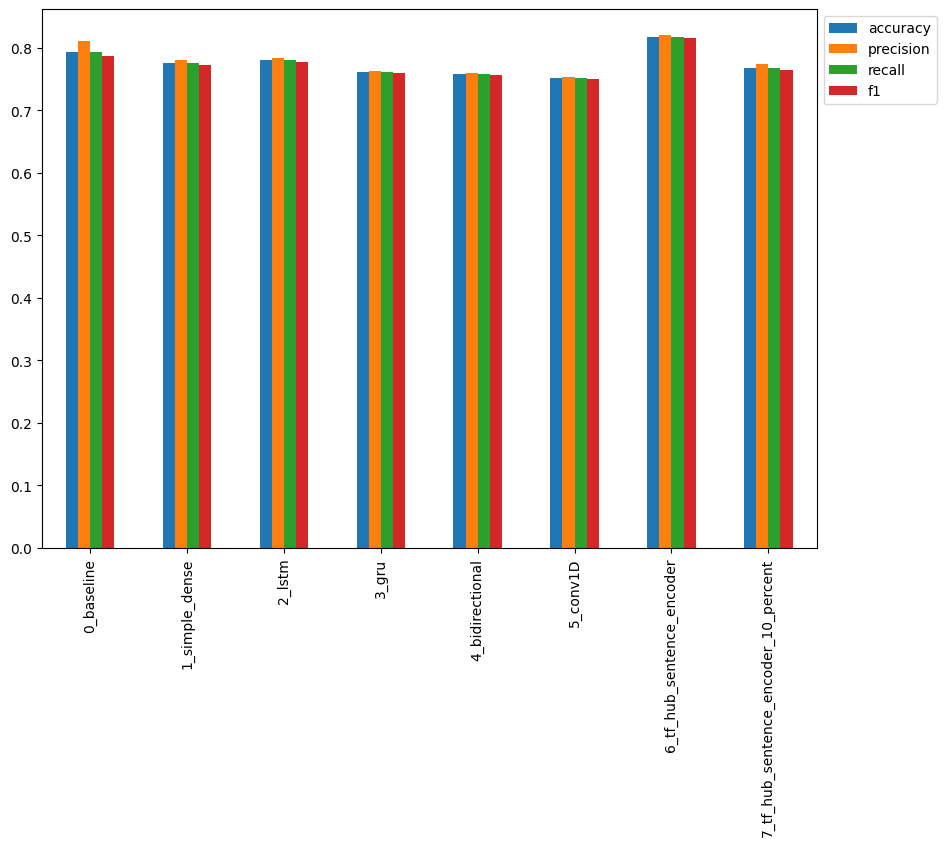

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

<Axes: >

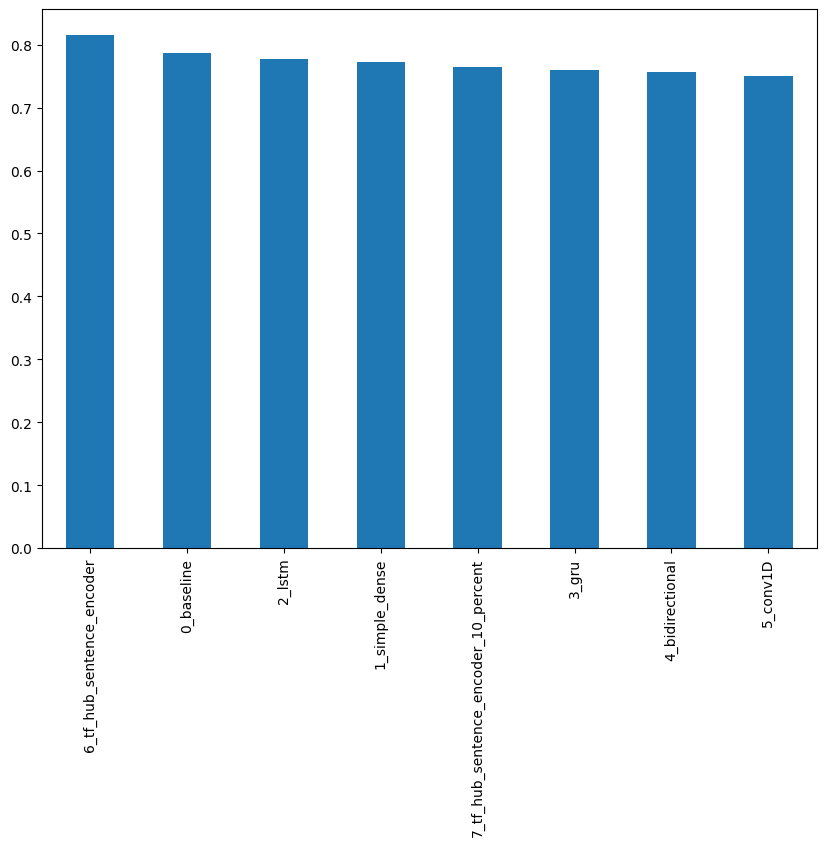

In [ ]:
# Sort model results by F1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10,7))

## Saving and loading a trained model

There are two main formats to save a model to in TensorFlow:
1. The HDF5 format
2. The `SavedModel` format (this is the default when using TensorFlow)

https://www.tensorflow.org/tutorials/keras/save_and_load

In [ ]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow_hub as hub
# Load model with custom Hub Layer (required with HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [ ]:
# How does oyr loaded model perfomr?
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 19ms/step - loss: 0.4284 - accuracy: 0.8176


[0.42837679386138916, 0.817585289478302]

Now let's save to the `SavedModel` format... (see more  on this here: https://www.tensorflow.org/tutorials/keras/save_and_load)

In [ ]:
# Save TF Hub Sentence Encoder model to SaveModel format (default)
model_6.save("model_6_savedmodel_format")

In [ ]:
# Load in a model from the SaveModel format
loaded_model_6_savedmodel_format = tf.keras.models.load_model("model_6_savedmodel_format")

In [ ]:
# Evaluate model in SavedModel format
loaded_model_6_savedmodel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4284 - accuracy: 0.8176


[0.42837679386138916, 0.817585289478302]

To download from Colab: https://stackoverflow.com/questions/48774285/how-to-download-file-created-in-colaboratory-workspace

## Finding the most wrong examples

* If our best model still isn't perfect, what examples is it getting wrong?
* And of these wrong examples which ones is it getting *most* wrong (those  prediction probabilities closest to the opposite class)

For example if a sample should have a label of 0 but our model predicts a prediction probability of 0.999 (close to 1) and viceversa.

In [ ]:
# Donwload a pretrained model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2025-01-14 10:58:21--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.207, 64.233.188.207, 64.233.189.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.187.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip.1’

08_model_6_USE_feat 100%[===================>] 916.27M  25.9MB/s    in 35s     

2025-01-14 10:58:56 (26.0 MB/s) - ‘08_model_6_USE_feature_extractor.zip.1’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
replace 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  y
y
y

replace 08_model_6_USE_feature_extractor/variables/variables.index? [y]es, [n]o, [A]ll, [N]on

In [ ]:
# Import previously trained model from Google storage
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723119258880615, 0.8162729740142822]

In [ ]:
# Make predictions with the loaded model from Gs
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10] #these should be in label format

24/24 [==============================] - 1s 10ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Create DataFrame with validation sentences , validation sentenes and best
# performing model predicions
val_df = pd.DataFrame({"text":val_sentences,
                       "target":val_labels,
                       "pred":model_6_pretrained_preds,
                       "pred_probs":tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_probs
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_probs", ascending=False)
most_wrong[:10] #these are false positives

,text,target,pred,pred_probs
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


Let's remind ourselves of the target labels...
* `0` = not disaster
* `1` = disaster

In [ ]:
most_wrong.tail() # these are false neggatives

,text,target,pred,pred_probs
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


In [ ]:
# Check the false positives
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_probs = row
  print(f"Text: \n{text}\n")
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_probs}")
  print("----\n")
# Para row en most_wrong iterate over namedtupples(itertuples())

Text: 
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

Target: 0, Pred: 1.0, Prob: 0.9101957082748413
----

Text: 
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

Target: 0, Pred: 1.0, Prob: 0.8769820332527161
----

Text: 
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

Target: 0, Pred: 1.0, Prob: 0.8523001670837402
----

Text: 
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

Target: 0, Pred: 1.0, Prob: 0.8354544043540955
----

Text: 
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

Target: 0, Pred: 1.0, Prob: 0.8272131681442261
----

Text: 
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

Target: 0, Pred: 1.0, Prob: 0.81481587886810

In [ ]:
# Check the false negatives (model predicted 0 wehn should've been 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_probs = row
  print(f"Text: \n{text}\n")
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_probs}")
  print("----\n")

Text: 
@DavidVonderhaar At least you were sincere ??

Target: 1, Pred: 0.0, Prob: 0.06730345636606216
----

Text: 
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

Target: 1, Pred: 0.0, Prob: 0.055075839161872864
----

Text: 
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

Target: 1, Pred: 0.0, Prob: 0.054603397846221924
----

Text: 
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

Target: 1, Pred: 0.0, Prob: 0.05459701269865036
----

Text: 
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

Target: 1, Pred: 0.0, Prob: 0.04963730648159981
----

Text: 
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

Target: 1, Pred: 0.0, Prob: 0.04391849413514137
----

Text: 
I get to smoke my

## Making predictions on test dataset

In [ ]:
# Making predictions on the test dataset and visualizing them
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences,10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample])) #our model expect a list as input
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")


1/1 [==============================] - 0s 51ms/step
Pred: 1, Prob: 0.9430041909217834
Text:
Latest: USA: Huge sinkhole swallows up Brooklyn intersection http://t.co/vspKHg3nZy

----

1/1 [==============================] - 0s 43ms/step
Pred: 1, Prob: 0.9628240466117859
Text:
NASA MODIS image: Dust storm over Morocco and the Straits of Gibraltar http://t.co/Q1jBreEsXv #duststorm

----

1/1 [==============================] - 0s 40ms/step
Pred: 0, Prob: 0.2533632218837738
Text:
Twitter is going to be a war zone today  https://t.co/1QHNqCZvod

----

1/1 [==============================] - 0s 47ms/step
Pred: 1, Prob: 0.8527684211730957
Text:
Attention Service Members Veterans Educators First Responders in Jacksonville FL http://t.co/4UrtBEAcE5

----

1/1 [==============================] - 0s 51ms/step
Pred: 0, Prob: 0.046418197453022
Text:
@Louis_Tomlinson if u relate to billie jean then ur gonna also enjoy blood on the dance floor so #BuyBloodOnTheDanceFloorOniTunes

----

1/1 [=============

## Your challenge... predict on Tweets from the wild

Go to your favourite Twitter account and copy one of their latest Tweets.

Then pass that Tweet through our trained model.

Is that Tweet a disaster or not disaster (according to the model)? Is the model right or wrong?

In [ ]:
# Turn tweet into string
tweet = "Wow! Palisades in LA is COMPLETELY GONE.. This is horrible."

In [ ]:
# Create a function to return the prediction
def predict_tweets(model, sentence):
  """
  Uses a model to make a predicction on a sentence (tweet).

  It retunr the sentece, the predicted label and the prediction probability
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Text:\n{sentence}\n")
  print(f"Pred: {pred_label}", "(Real disaster)" if pred_label >0 else "(Not real disaster)", f"Prob: {pred_prob[0][0]}")

In [ ]:
predict_tweets(model_6,tweet)

1/1 [==============================] - 0s 41ms/step
Text:
Wow! Palisades in LA is COMPLETELY GONE.. This is horrible.

Pred: 1.0 (Real disaster) Prob: 0.5382128953933716


In [ ]:
tweet = "the fires in LA are currently burning through about 5 football fields a minute. over 2,900 acres have been burned and over 80,000 people have had to evacuate. so many who lost homes. such a devastating and frightening situation."

In [ ]:
predict_tweets(model_6_pretrained,tweet)

1/1 [==============================] - 0s 40ms/step
Text:
the fires in LA are currently burning through about 5 football fields a minute. over 2,900 acres have been burned and over 80,000 people have had to evacuate. so many who lost homes. such a devastating and frightening situation.

Pred: 1.0 (Real disaster) Prob: 0.9723275899887085


In [ ]:
tweet = "View from the sky above LA. Pacific Palisades and Malibu engulfed in flames.  Absolutely Horrific."
predict_tweets(model_6_pretrained,tweet)

1/1 [==============================] - 0s 66ms/step
Text:
View from the sky above LA. Pacific Palisades and Malibu engulfed in flames.  Absolutely Horrific.

Pred: 1.0 (Real disaster) Prob: 0.9603350758552551


In [ ]:
tweet = "Devastating fire storms developing in LA. If you’re in the area please stay safe and be ready to evacuate"
predict_tweets(model_6_pretrained,tweet)

1/1 [==============================] - 0s 68ms/step
Text:
Devastating fire storms developing in LA. If you’re in the area please stay safe and be ready to evacuate

Pred: 1.0 (Real disaster) Prob: 0.9647043347358704


In [ ]:
tweet = "A partir del domingo llegará una masa de aire frío, con un descenso térmico acusado. Habrá heladas generalizadas, incluso cerca de la costa."
predict_tweets(model_6_pretrained,tweet)

1/1 [==============================] - 0s 72ms/step
Text:
A partir del domingo llegará una masa de aire frío, con un descenso térmico acusado. Habrá heladas generalizadas, incluso cerca de la costa.

Pred: 0.0 (Not real disaster) Prob: 0.2554081082344055


In [ ]:
tweet = "Es increíble el poder perruno de comer cualquier cosa que ande tirada aunque sea mierda pero si le das una pastilla disfrazada entre 6 quedos ahumados te miran tipo pensas que soy estupido y te la escupen ahi. HAY QUE SER JODIDO FLACO"
predict_tweets(model_6_pretrained,tweet)

1/1 [==============================] - 0s 61ms/step
Text:
Es increíble el poder perruno de comer cualquier cosa que ande tirada aunque sea mierda pero si le das una pastilla disfrazada entre 6 quedos ahumados te miran tipo pensas que soy estupido y te la escupen ahi. HAY QUE SER JODIDO FLACO

Pred: 0.0 (Not real disaster) Prob: 0.0727972462773323


In [ ]:
tweet = "Un astrofotógrafo entusiasta logró capturar la salida simultánea de la Luna y Venus! "
predict_tweets(model_6_pretrained,tweet)

1/1 [==============================] - 0s 75ms/step
Text:
Un astrofotógrafo entusiasta logró capturar la salida simultánea de la Luna y Venus! 

Pred: 0.0 (Not real disaster) Prob: 0.11707132309675217


In [ ]:
tweet = "This is what’s left of the Pacific Palisades. The mall survived. Most everything else is gone. Homes, apartment complexes… businesses."
predict_tweets(model_6_pretrained,tweet)

1/1 [==============================] - 0s 68ms/step
Text:
This is what’s left of the Pacific Palisades. The mall survived. Most everything else is gone. Homes, apartment complexes… businesses.

Pred: 0.0 (Not real disaster) Prob: 0.44499367475509644


## The speed/score tradeoff



In [ ]:
# Let's make a function to measeure the time of prediction
import time
def pred_timer (model, samples):
  """
  Times how long a model takes to make predictions on samples.
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples)
  end_time = time.perf_counter() # get time end
  total_time = end_time - start_time # calculate how long prediction took to make
  time_per_pred = total_time / len(samples)
  return total_time, time_per_pred

In [ ]:
# Calculate TF Hub sentence enconder time per pred
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6_pretrained,
                                                            samples = val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 17ms/step


(0.5346878830000605, 0.0007016901351706832)

In [ ]:
# Calculate our baseline model times per pred
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0,
                                                            samples = val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.03690159899997525, 4.842729527555807e-05)

In [ ]:
# Get results for pretrained GS model
model_6_pretrained_results = calculate_results(np.array(val_labels), np.array(model_6_pretrained_preds))
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1': 0.8148082644367335}

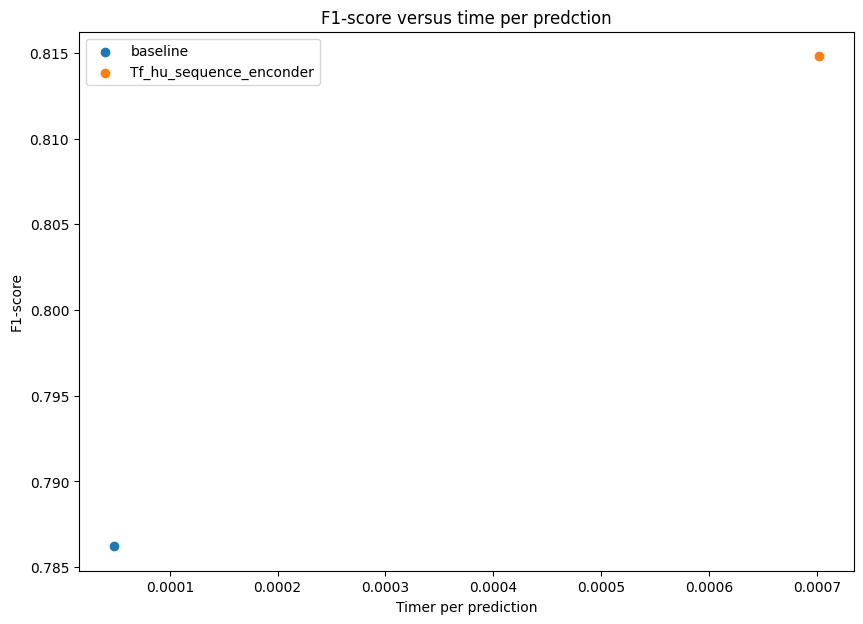

In [ ]:
# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_pretrained_results["f1"], label="Tf_hu_sequence_enconder")
plt.legend()
plt.title("F1-score versus time per predction")
plt.xlabel("Timer per prediction")
plt.ylabel("F1-score");


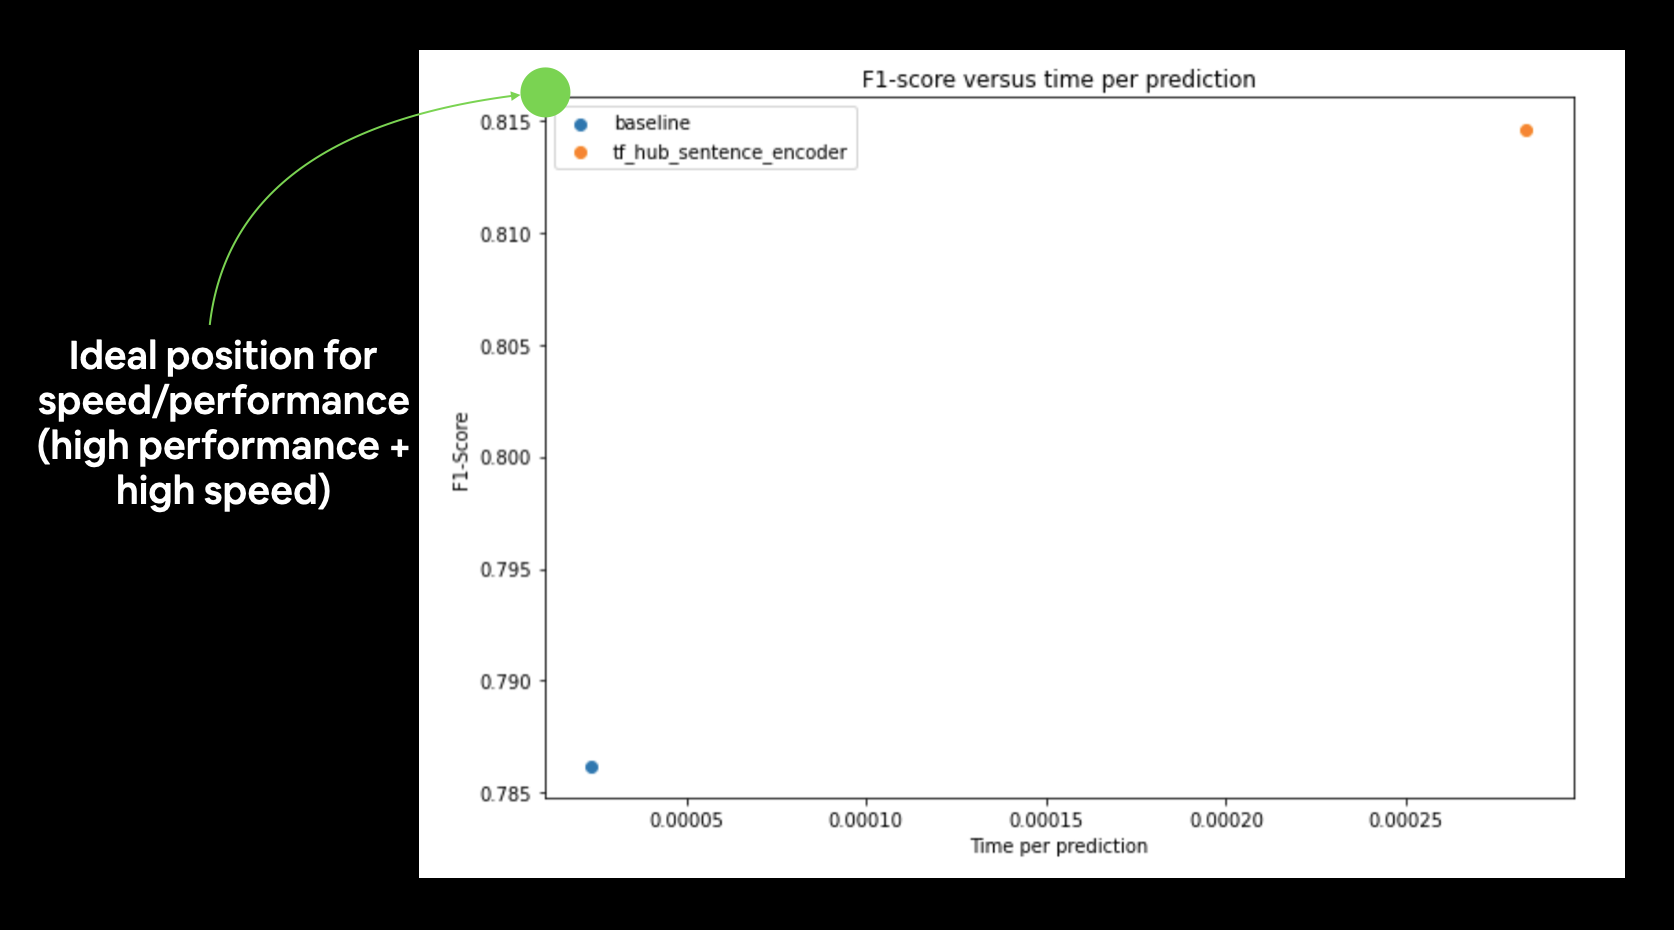

## Exercises

1. Rebuild, compile and train `model_1`, `model_2` and `model_5` using the Keras Sequential API insteadof the Functional API

In [ ]:
# Create model 7
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_7_USE_10_percent")

# Clone model_6 but reset weights
#model_7 = tf.keras.models.clone_model(model_6)

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_7.summary()

Model: "model_7_USE_10_percent"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_9 (Dense)             (None, 64)                32832     
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# ReBuild model_1  with the Keras SEquential API
from tensorflow.keras import layers

max_vocab_length = 10000
max_length = 15

model_1 = tf.keras.Sequential([
    text_vectorizer,
    layers.Embedding(input_dim = max_vocab_length, # set input shape
                             output_dim = 128),#output shape
    layers.GlobalAveragePooling1D(),
    layers.Dense(1, activation="sigmoid")

])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1_rebuild= model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels))



Epoch 1/5
215/215 [==============================] - 5s 18ms/step - loss: 0.6208 - accuracy: 0.6669 - val_loss: 0.5625 - val_accuracy: 0.7310
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.4916 - accuracy: 0.7822 - val_loss: 0.5024 - val_accuracy: 0.7638
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4385 - accuracy: 0.8072 - val_loss: 0.4865 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 5s 21ms/step - loss: 0.4123 - accuracy: 0.8156 - val_loss: 0.4843 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 4s 16ms/step - loss: 0.3952 - accuracy: 0.8202 - val_loss: 0.4892 - val_accuracy: 0.7782


In [ ]:
# Evaluate the model
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.7782


[0.48923447728157043, 0.778215229511261]

In [ ]:
# MAke predictions
model_1_rebuild_pred_probs = model_1.predict(val_sentences)

# Turn prediction probabiliest
model_1_rebuild_preds = tf.squeeze(tf.round(model_1_rebuild_pred_probs))

24/24 [==============================] - 0s 2ms/step


In [ ]:
# Calcules model 1 metrics
model_1_rebuild_results = calculate_results(y_true=np.array(val_labels),
                                            y_pred=np.array(model_1_rebuild_preds))
model_1_rebuild_results

{'accuracy': 77.82152230971128,
 'precision': 0.7817665184655122,
 'recall': 0.7782152230971129,
 'f1': 0.7754656354277033}

In [ ]:
# Rebuild model_2

max_vocab_length = 10000
max_length = 15

model_2_rebuild = tf.keras.Sequential([
    text_vectorizer,
    layers.Embedding(input_dim = max_vocab_length,
                           output_dim = 128),
    layers.LSTM(64),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2_rebuild.compile(loss="binary_crossentropy",
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["accuracy"])

# Fit the model
history_2_rebuild = model_2_rebuild.fit(train_sentences,
                                        train_labels,
                                        epochs=5,
                                        validation_data=(val_sentences,val_labels))


Epoch 1/5
215/215 [==============================] - 10s 36ms/step - loss: 0.5311 - accuracy: 0.7287 - val_loss: 0.4998 - val_accuracy: 0.7520
Epoch 2/5
215/215 [==============================] - 6s 28ms/step - loss: 0.4191 - accuracy: 0.8143 - val_loss: 0.5190 - val_accuracy: 0.7520
Epoch 3/5
215/215 [==============================] - 7s 34ms/step - loss: 0.3931 - accuracy: 0.8330 - val_loss: 0.5082 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 6s 28ms/step - loss: 0.3710 - accuracy: 0.8412 - val_loss: 0.4980 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 7s 34ms/step - loss: 0.3465 - accuracy: 0.8556 - val_loss: 0.5620 - val_accuracy: 0.7638


In [ ]:
# Make predictions
model_2_rebuild_pred_probs = model_2_rebuild.predict(val_sentences)
model_2_rebuild_preds = tf.squeeze(tf.round(model_2_rebuild_pred_probs))
model_2_rebuild_results = calculate_results(y_true=np.array(val_labels),
                                            y_pred=np.array(model_2_rebuild_preds))
model_2_rebuild_results


24/24 [==============================] - 0s 5ms/step


{'accuracy': 76.37795275590551,
 'precision': 0.7807656016138479,
 'recall': 0.7637795275590551,
 'f1': 0.7559640961114027}

In [ ]:
# Rebuild model_5

max_vocab_length = 10000

model_5_rebuild = tf.keras.Sequential([
    text_vectorizer,
    layers.Embedding(input_dim = max_vocab_length,
                           output_dim = 128),
    layers.Conv1D(filters=32, kernel_size=5, activation="relu"),
    layers.GlobalAveragePooling1D(),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_5_rebuild.compile(loss="binary_crossentropy",
                           optimizer=tf.keras.optimizers.Adam(),
                           )

# Fit the model
history_5_rebuild = model_5_rebuild.fit(train_sentences,
                                        train_labels,
                                        epochs=5,
                                        validation_data=(val_sentences,val_labels))


Epoch 1/5
215/215 [==============================] - 6s 25ms/step - loss: 0.5547 - val_loss: 0.4965
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.4291 - val_loss: 0.4941
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3997 - val_loss: 0.4970
Epoch 4/5
215/215 [==============================] - 4s 21ms/step - loss: 0.3767 - val_loss: 0.5086
Epoch 5/5
215/215 [==============================] - 5s 22ms/step - loss: 0.3608 - val_loss: 0.5354


In [ ]:
# MAke predictions
model_5_rebuild_pred_probs = model_5_rebuild.predict(val_sentences)
model_5_rebuild_preds = tf.squeeze(tf.round(model_5_rebuild_pred_probs))
results_model_5_rebuild = calculate_results(np.array(val_labels),
                                            np.array(model_5_rebuild_preds))
results_model_5_rebuild


24/24 [==============================] - 0s 3ms/step


{'accuracy': 76.50918635170603,
 'precision': 0.7794238148893404,
 'recall': 0.7650918635170604,
 'f1': 0.7581581940741088}

2 . Retrain the baseline model with 10% of the training data. How does perform compared to the Universal Sentence Enconder model with 10% of the training data?

The Universal Sentece Enconder perfoms better than the baseline with 10% of the data.

In [ ]:
# First let's split the data
# One kind of correct way (there are more) to make data subset
# (split the already split train_sentences/train_labels)
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)


In [ ]:
# Rebuild de baseline model
model_0_rebuild = Pipeline([
    ("tfidf",TfidfVectorizer()),
    ("clf", MultinomialNB())
])

# Fit the model
model_0_rebuild.fit(train_sentences_10_percent, train_labels_10_percent)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0_rebuild_pred_probs = model_0_rebuild.predict_proba(val_sentences)
model_0_rebuild_preds = model_0_rebuild.predict(val_sentences)
model_0_rebuild_results = calculate_results(y_true=np.array(val_labels),
                                            y_pred=np.array(model_0_rebuild_preds))
model_0_rebuild_results


{'accuracy': 70.60367454068242,
 'precision': 0.7777273287601192,
 'recall': 0.7060367454068242,
 'f1': 0.6747604694140249}

In [ ]:
model_7_results

{'accuracy': 76.77165354330708,
 'precision': 0.7732501179288073,
 'recall': 0.7677165354330708,
 'f1': 0.7638693672676267}

3. Try fine-tuning the TF Hub Universal Sentence Enconder model by setting `training=True` when instantiating it as Keras layer.

In [ ]:
#We can use this encoding layer in place of our text_vectorizer and embedding layer

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=True) # turn training on to fine-tune the TensorFlow Hub model

In [ ]:
# Create model using the Sequential API
model_6_fine_tune = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6_fine_tune.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_6_fine_tune = model_6_fine_tune.fit(train_sentences,
                                            train_labels,
                                            epochs=5,
                                            validation_data=(val_sentences, val_labels))

Epoch 1/5


In [ ]:
model_6_fine_tune_pred_probs = model_6_fine_tune.predict(val_sentences)
model_6_fine_tune_preds = tf.squeeze(tf.round(model_6_fine_tune_pred_probs))
model_6_fine_tune_results = calculate_results(y_true=np.array(val_labels),
                                            y_pred=np.array(model_6_fine_tune_preds))
model_6_fine_tune_results

4. Retrain the best model you've got so far on the whole training set (no validation split). Then use this trained model to make predictions on the test dataset and format the predictions into the same format as the `sample_submission.csv` file from Kaggle. How did your model perform?

In [ ]:
# Create model using the Sequential API
model_6_rebuild = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6_rebuild.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_6_rebuild = model_6_rebuild.fit(train_sentences,
                              train_labels,
                              epochs=5)


In [ ]:
model_6_rebuild_pred_probs = model_6_rebuild.evaluate(val_sentences, val_labels)
model_6_preds = tf.squeeze(tf.round(model_6_rebuild_pred_probs))
model_6_results = calculate_results(y_true=np.array(val_labels),
                                            y_pred=np.array(model_6_preds))
model_6_results
